In [1]:
include("src/binnedarrays.jl")

mapBins (generic function with 2 methods)

In [2]:
using PyPlot
include("src/voronoibinning.jl")
include("src/maxent.jl")
include("src/netcdf.jl")

INFO: Loading help data...


read_ncdf (generic function with 1 method)

#Voronoi Binning

In [87]:
test_data = read_ncdf("data/d3d_test_data.cdf")
spec = test_data["transp_spec"][:,2];
err = test_data["transp_err"][:,2];

In [88]:
tmat = read_ncdf("data/d3d_transfer_matrix.cdf")
A = tmat["transfer_matrix"]
energy = tmat["energy"]
pitch = tmat["pitch"]
dE = energy[2]-energy[1]
dP = pitch[2]-pitch[1]
IWF = reshape(sum(A .* max(spec,0) ,1) ,100,100);

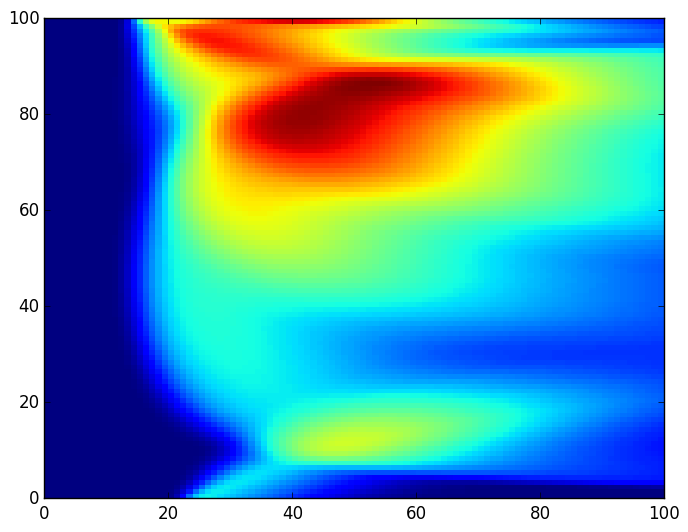

PyObject <matplotlib.collections.PolyCollection object at 0x2cfece90>

In [89]:
pcolor(IWF)

In [207]:
IWFbinned = voronoiBinning(IWF,15*maximum(IWF),threshold=-0.1)
IWFbinned.map.nbins

225

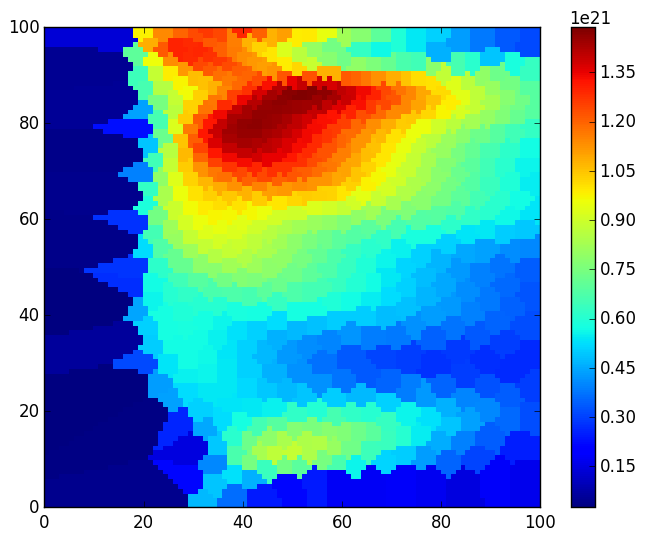

PyObject <matplotlib.colorbar.Colorbar instance at 0x4aa23cf8>

In [194]:
plotBinValues(IWFbinned)

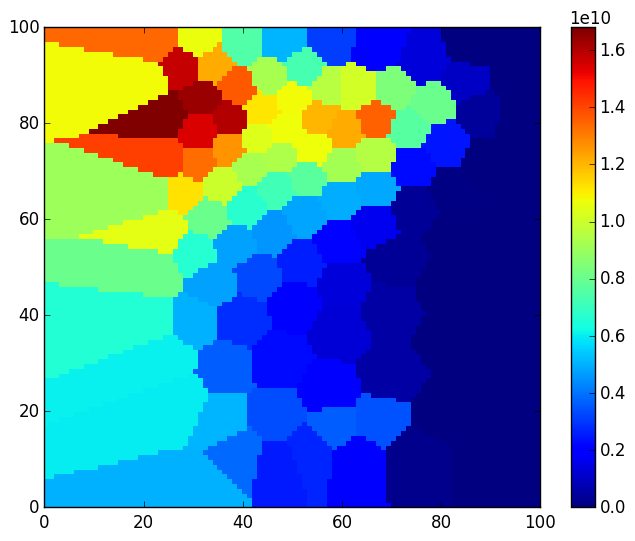

PyObject <matplotlib.colorbar.Colorbar instance at 0x53a7ed40>

In [187]:
plotBinValues(transp_binned)

In [208]:
#Create new transfer matrix
nr,nc = size(A)
vA = zeros(nr,IWFbinned.map.nbins)
for i=1:nr
    tmp = mapBins(IWFbinned.map,reshape(A[i,:],100,100))
    vA[i,:] = tmp.values.*tmp.map.nelements + 1
end

In [209]:
fp,rchisq,status = maxEnt(vA,spec,err,IWFbinned.map,Ascale=1e4,rChisq=1.0);
fp.values = (fp.values)./(dE*dP);

 PB allocation in DMUMPS_185


INFO: Optimal Solution Found!


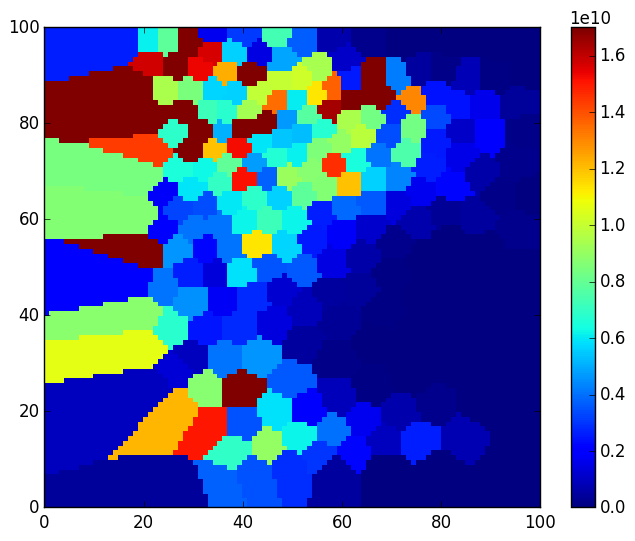

4.1767568207807884e10

In [210]:
f = zeros(100,100)
for i=1:length(f)
    f[i] = fp[i]
end
pcolor(f,vmax=1.7e10)
colorbar()
maximum(f)

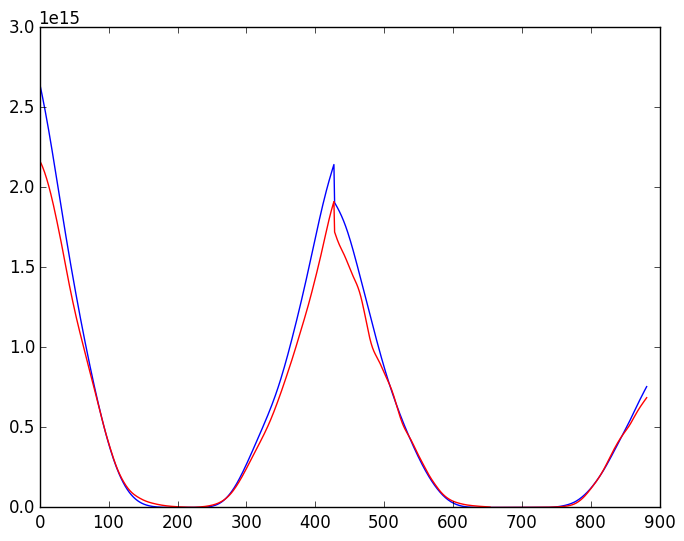

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x5027c8d0>

In [203]:
transp = read_ncdf("data/test_distributions.cdf","transp")
transp_binned = mapBins(IWFbinned.map,transp)
#plot(spec,"k",alpha=0.3)
plot(vA*(transp_binned.values).*(dE*dP))
plot(vA*((fp.values).*(dE*dP)),"r")
#yscale("log")

In [78]:
sum(transp_binned.values.*transp_binned.map.nelements)

4.999999999999995e13

In [188]:
sum(fp.values.*fp.map.nelements)/sum(transp_binned.values.*transp_binned.map.nelements)

0.9792930326901408

In [143]:
mean(abs(fp.values.*fp.map.nelements - transp_binned.values.*transp_binned.map.nelements))*dE*dP

7.782258114296781e8

In [81]:
include("src/tsvd.jl")

tsvd (generic function with 2 methods)

In [189]:
fp,rchisq,status = tsvd(vA,spec,err);

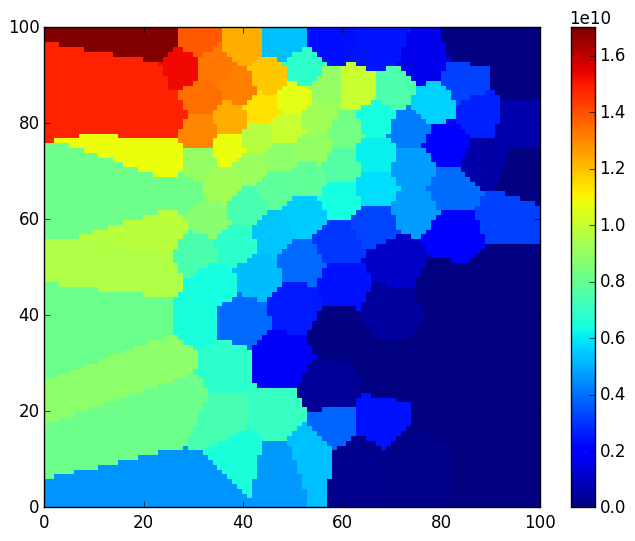

PyObject <matplotlib.colorbar.Colorbar instance at 0xa7b1830>

In [190]:
ff = mapBins(IWFbinned.map,fp./(dE*dP))
f = zeros(100,100)
for i=1:length(f)
    f[i] = ff[i]
end
pcolor(f,vmax=1.7e10)
colorbar()

In [103]:
include("src/gradients.jl")
include("src/linreg.jl")

linRegEP (generic function with 1 method)

In [191]:
fp,rchisq,status = linRegEP(vA,spec,err,energy,pitch,method=:Tikhonov0);

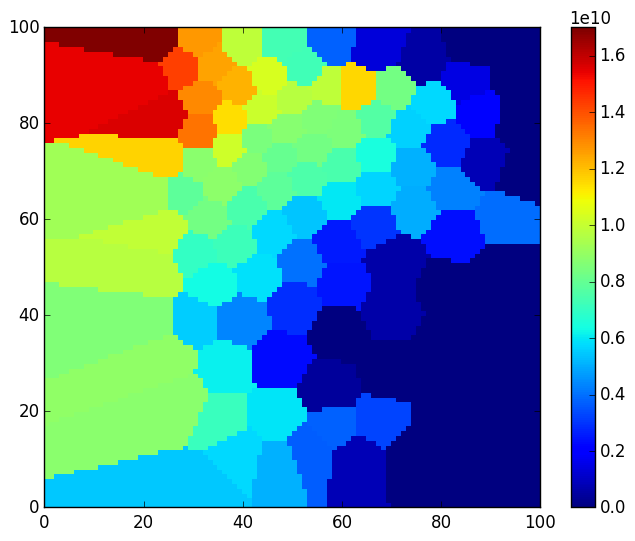

PyObject <matplotlib.colorbar.Colorbar instance at 0x466d5290>

In [192]:
ff = mapBins(IWFbinned.map,fp./(dE*dP))
f = zeros(100,100)
for i=1:length(f)
    f[i] = ff[i]
end
pcolor(f,vmax=1.7e10)
colorbar()